# Homework 9

## Problem 14

In this problem we have to train an RBF model of the form 

$\text{sign} \left( \sum_{k=1}^{K} w_k \exp ( -\gamma \lVert \mathbf{x}_n - \mathbf{\mu}_k \rVert^2 ) + b \right)$

We can interpret this as

$\text{sign} \left( \sum_{k=1}^{K} w_k \exp ( -\gamma \lVert \mathbf{x}_n - \mathbf{\mu}_k \rVert^2 ) + w_0 \cdot 1 \right)$

## 14.1 Import libraries

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.style as style
style.use('bmh')

import algo    # contains my implementation of Llyod's algorithm + pseudoInverse
               # (see file algo.py)

# suppress scientific notation
np.set_printoptions(suppress=True)

from sklearn.cluster import KMeans

## 14.2 Target function $f$

In [2]:
# target function
def f(x1, x2):
    return np.sign(x2 - x1 + 0.25 * np.sin(np.pi * x1))

## 14.3 Computing $E_{out}$

In [3]:
def count_kernel_better_than_regular_RBF(K, number_of_runs):
    
    RUNS = number_of_runs
    run_counter = 0
    count_svm_better_than_lloyd = 0
    
    
    while run_counter < RUNS:
    
        # print run_counter every 10 steps
        if run_counter % 10 == 0:
            print("run number ", run_counter)
    
        # Generate training data
        N_train = 100
        X_train = np.random.uniform(-1,1,(N_train,2))
        y_train = f(X_train[:,0], X_train[:,1])

        # Generate test data
        N_test = 1000
        X_test = np.random.uniform(-1,1,(N_test,2))
        y_test = f(X_test[:,0], X_test[:,1])

        # SVM
        clf = svm.SVC(C = np.inf, kernel = 'rbf', gamma = 1.5)
        clf.fit(X_train, y_train)
        E_out_svm = sum(clf.predict(X_test) != y_test) / N_test
        #print("E_out for SVM = ", E_out_svm)
        
        # compute in-sample error E_in for the SVM classifier
        E_in_svm = sum(clf.predict(X_train) != y_train) / N_train
        if E_in_svm > 0:
            print("E_in for SVM classifier is nonzero! Discarding run")
            continue
    

        # Lloyd + pseudoInv
        lloyd = algo.kmeans_RBF(num_clusters = K, gamma = 1.5)
        lloyd.fit(X_train, y_train)
        E_out_lloyd = sum(lloyd.predict(X_test) != y_test) / N_test
        #print("E_out for Lloyd = ", E_out_lloyd)
    
        if E_out_svm < E_out_lloyd:
            count_svm_better_than_lloyd += 1
    
        #print("\n\n-----\n\n")
        run_counter += 1
    
    print("Result: E_out_svm < E_out_lloyd {}% of the time".format(count_svm_better_than_lloyd / RUNS * 100))
    

count_kernel_better_than_regular_RBF(9, 100)

run number  0
run number  10
run number  20
run number  30
run number  40
run number  50
run number  60
run number  70
run number  80
run number  90
Result: E_out_svm < E_out_lloyd 91.0% of the time


## Result

In 1000 runs the SVM classifier beats the LLoyd + PseudoInverse classifier $93\%$ of the time. Thus, answer **14[e]** is the correct answer.

## Problem 15

Same as Problem 14, except that we have $K = 12$.

In [4]:
count_kernel_better_than_regular_RBF(12, 100)

run number  0
run number  10
run number  20
run number  30
run number  40
run number  50
run number  60
run number  70
run number  80
run number  90
Result: E_out_svm < E_out_lloyd 85.0% of the time


## Result

In 1000 runs the SVM classifier beats the LLoyd + PseudoInverse classifier $82\%$ of the time. Thus, answer **15[d]** is the correct answer.

## Problem 16

We have to compare the regular RBF using $K = 9$ with the regular RBF using $K = 12$ in each run. We are given 5 cases, and we have to count which of the 5 cases occurs most often over all runs.

run number  0
run number  10
run number  20
run number  30
run number  40
run number  50
run number  60
run number  70
run number  80
run number  90
Result Problem 16: The winner is option d


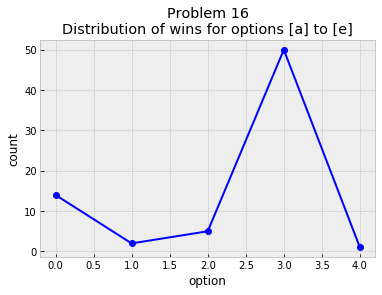

In [5]:
def problem16(number_of_runs):
    
    RUNS = number_of_runs
    run_counter = 0
    
    # counter for which option wins
    count_winner_options = [0 for _ in range(5)]
    
    
    while run_counter < RUNS:
    
        # print run_counter every 10 steps
        if run_counter % 10 == 0:
            print("run number ", run_counter)
    
        # Generate training data
        N_train = 100
        X_train = np.random.uniform(-1,1,(N_train,2))
        y_train = f(X_train[:,0], X_train[:,1])

        # Generate test data
        N_test = 1000
        X_test = np.random.uniform(-1,1,(N_test,2))
        y_test = f(X_test[:,0], X_test[:,1])

        
        # for a fixed given data set, compare the two regular RBF
        E_in_values = [None, None]
        E_out_values = [None, None]
        
        for index, K in enumerate([9, 12]):

            # regular RBF = Lloyd + pseudoInv
            lloyd = algo.kmeans_RBF(num_clusters = K, gamma = 1.5)
            lloyd.fit(X_train, y_train)
            E_in_lloyd = sum(lloyd.predict(X_train) != y_train) / N_train
            E_out_lloyd = sum(lloyd.predict(X_test) != y_test) / N_test
            
            E_in_values[index] = E_in_lloyd
            E_out_values[index] = E_out_lloyd
    
        # checking option [a]: E_in goes down, E_out goes up
        if (E_in_values[0] > E_in_values[1]) and (E_out_values[0] < E_out_values[1]):
            count_winner_options[0] += 1
        
        # checking option [b]: E_in goes up, E_out goes down
        if (E_in_values[0] < E_in_values[1]) and (E_out_values[0] > E_out_values[1]):
            count_winner_options[1] += 1
    
        # checking option [c]: both E_in and E_out go up
        if (E_in_values[0] < E_in_values[1]) and (E_out_values[0] < E_out_values[1]):
            count_winner_options[2] += 1
    
        # checking option [d]: both E_in and E_out go down
        if (E_in_values[0] > E_in_values[1]) and (E_out_values[0] > E_out_values[1]):
            count_winner_options[3] += 1
    
        # checking option [e]: E_in and E_out remain the same
        if (E_in_values[0] == E_in_values[1]) and (E_out_values[0] == E_out_values[1]):
            count_winner_options[4] += 1
    
        run_counter += 1
    
    option_with_most_wins = np.argmax(count_winner_options)
    print("Result Problem 16: The winner is option {}".format(["a", "b", "c", "d", "e"][option_with_most_wins]))
    
    plt.plot(count_winner_options, 'bo-')
    plt.title("Problem 16\nDistribution of wins for options [a] to [e]")
    plt.xlabel("option")
    plt.ylabel("count")
    plt.show()
    

problem16(100)

## Result

Option 3, i.e. option [d] has the most wins in 100 runs. Thus, answer **16[d]** is correct.

## Problem 17

We consider the regular RBF (Lloyd + PseudoInverse) for $\gamma = 1.5$ and $\gamma = 2$. Which of the given five options wins the most when going from $\gamma = 1.5$ to $\gamma = 2$?

run number  0
run number  10
run number  20
run number  30
run number  40
run number  50
run number  60
run number  70
run number  80
run number  90
Result Problem 17: The winner is option c


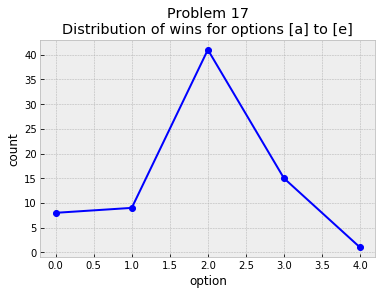

In [6]:
def problem17(number_of_runs):
    
    RUNS = number_of_runs
    run_counter = 0
    
    # counter for which option wins
    count_winner_options = [0 for _ in range(5)]
    
    
    while run_counter < RUNS:
    
        # print run_counter every 10 steps
        if run_counter % 10 == 0:
            print("run number ", run_counter)
    
        # Generate training data
        N_train = 100
        X_train = np.random.uniform(-1,1,(N_train,2))
        y_train = f(X_train[:,0], X_train[:,1])

        # Generate test data
        N_test = 1000
        X_test = np.random.uniform(-1,1,(N_test,2))
        y_test = f(X_test[:,0], X_test[:,1])

        
        # for a fixed given data set, compare the two regular RBF
        E_in_values = [None, None]
        E_out_values = [None, None]
        
        for index, gamma_value in enumerate([1.5, 2]):

            # regular RBF = Lloyd + pseudoInv
            lloyd = algo.kmeans_RBF(num_clusters = 9, gamma = gamma_value)
            lloyd.fit(X_train, y_train)
            E_in_lloyd = sum(lloyd.predict(X_train) != y_train) / N_train
            E_out_lloyd = sum(lloyd.predict(X_test) != y_test) / N_test
            
            E_in_values[index] = E_in_lloyd
            E_out_values[index] = E_out_lloyd
    
        # checking option [a]: E_in goes down, E_out goes up
        if (E_in_values[0] > E_in_values[1]) and (E_out_values[0] < E_out_values[1]):
            count_winner_options[0] += 1
        
        # checking option [b]: E_in goes up, E_out goes down
        if (E_in_values[0] < E_in_values[1]) and (E_out_values[0] > E_out_values[1]):
            count_winner_options[1] += 1
    
        # checking option [c]: both E_in and E_out go up
        if (E_in_values[0] < E_in_values[1]) and (E_out_values[0] < E_out_values[1]):
            count_winner_options[2] += 1
    
        # checking option [d]: both E_in and E_out go down
        if (E_in_values[0] > E_in_values[1]) and (E_out_values[0] > E_out_values[1]):
            count_winner_options[3] += 1
    
        # checking option [e]: E_in and E_out remain the same
        if (E_in_values[0] == E_in_values[1]) and (E_out_values[0] == E_out_values[1]):
            count_winner_options[4] += 1
    
        run_counter += 1
    
    option_with_most_wins = np.argmax(count_winner_options)
    print("Result Problem 17: The winner is option {}".format(["a", "b", "c", "d", "e"][option_with_most_wins]))
    
    plt.plot(count_winner_options, 'bo-')
    plt.title("Problem 17\nDistribution of wins for options [a] to [e]")
    plt.xlabel("option")
    plt.ylabel("count")
    plt.show()
    

problem17(100)

## Result

Option 2, i.e. option [c] has the most wins in 100 runs. Thus, the correct answer is **17[c]**.

## Problem 18

Consider the regular RBF with $K = 9$ and $\gamma = 1.5$. What is the percentage of time that this classifier achieves $E_{in} = 0$ ?

In [7]:
def problem18(number_of_runs):
    
    RUNS = number_of_runs
    run_counter = 0
    counter_E_in_equals_zero = 0
    
    
    while run_counter < RUNS:
    
        # print run_counter every 100 steps
        if run_counter % 10 == 0:
            print("run number ", run_counter)
    
        # Generate training data
        N_train = 100
        X_train = np.random.uniform(-1,1,(N_train,2))
        y_train = f(X_train[:,0], X_train[:,1])

        # Generate test data
        N_test = 1000
        X_test = np.random.uniform(-1,1,(N_test,2))
        y_test = f(X_test[:,0], X_test[:,1])

        
        # regular RBF = Lloyd + pseudoInv with K = 9 and gamma = 1.5
        lloyd = algo.kmeans_RBF(num_clusters = 9, gamma = 1.5)
        lloyd.fit(X_train, y_train)
        E_in_lloyd = sum(lloyd.predict(X_train) != y_train) / N_train
        if E_in_lloyd == 0:
            counter_E_in_equals_zero += 1

            
        run_counter += 1

        
    print("Result Problem 18: E_in is zero {}% of the time".format(counter_E_in_equals_zero / RUNS * 100))

#---------------
    
problem18(100)

run number  0
run number  10
run number  20
run number  30
run number  40
run number  50
run number  60
run number  70
run number  80
run number  90
Result Problem 18: E_in is zero 6.0% of the time


## Result

In 1000 runs $E_{in}$ was zero $4\%$ of the time, thus, answer **18[a]** is the correct answer.